# SGH Take Home Exercise

Data source: https://www.kaggle.com/datasets/sambelkacem/covid19-algeria-and-world-dataset

## Import libraries and datasets

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#set notebook parameters
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 60)

In [2]:
#import datasets
df = pd.read_csv("Data.csv")

In [3]:
#check dataset size
df.shape

(38472, 15)

## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           38472 non-null  object 
 1   Continent                        38472 non-null  object 
 2   Latitude                         38472 non-null  float64
 3   Longitude                        38472 non-null  float64
 4   Average temperature per year     38472 non-null  int64  
 5   Hospital beds per 1000 people    38472 non-null  float64
 6   Medical doctors per 1000 people  38472 non-null  float64
 7   GDP/Capita                       38472 non-null  float64
 8   Population                       38472 non-null  int64  
 9   Median age                       38472 non-null  int64  
 10  Population aged 65 and over (%)  38472 non-null  int64  
 11  Date                             38472 non-null  object 
 12  Daily tests       

In [5]:
#convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
print(df['Date'].min())
print(df['Date'].max())

2020-01-01 00:00:00
2021-02-28 00:00:00


The dataset was collected from 1 Jan 2020 to 28 Feb 2021.

In [7]:
df.isnull().sum()

Entity                                0
Continent                             0
Latitude                              0
Longitude                             0
Average temperature per year          0
Hospital beds per 1000 people         0
Medical doctors per 1000 people       0
GDP/Capita                            0
Population                            0
Median age                            0
Population aged 65 and over (%)       0
Date                                  0
Daily tests                        7895
Cases                               254
Deaths                             3610
dtype: int64

There were 3 feature columns with null values. The most plausible reason would be that there were no tests/cases/deaths, and hence no data collected. We will investigate further before deciding on further actions.

In [8]:
df[df['Daily tests']==0]

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths


In [9]:
df[df['Cases']==0]

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths


In [10]:
df[df['Deaths']==0]

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths


There were indeed no '0' values in these columns, which made it more likely that the null values were due to no test/cases/deaths. Hence, we will replace the null values with '0' for better representation.

In [11]:
df.fillna(value=0, inplace=True)

## Visualization 1: Top 10 countries by highest number of cases

In [12]:
df2 = df.copy()
df2 = df2.groupby('Entity').max().sort_values(by='Cases',ascending=False)[:10].reset_index()
df2.head()

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,United States,North America,37.09,-95.71,11,2.77,2.57,65297.5,325719178,38,16,2021-02-28,2238400.0,28605669.0,513091.0
1,India,Asia,20.59,78.96,25,0.53,0.76,2099.6,1339180127,28,6,2021-02-28,1492409.0,11112241.0,157157.0
2,Russia,Asia,61.52,105.32,-2,8.05,3.98,11585.0,144495044,39,15,2021-02-28,648370.0,4198400.0,84700.0
3,United Kingdom,Europe,55.38,-3.44,8,2.54,2.82,42330.1,66022273,40,18,2021-02-28,801949.0,4188827.0,123083.0
4,France,Europe,46.23,2.21,13,5.98,3.24,40493.9,67118648,42,20,2021-02-28,739281.0,3747263.0,85741.0


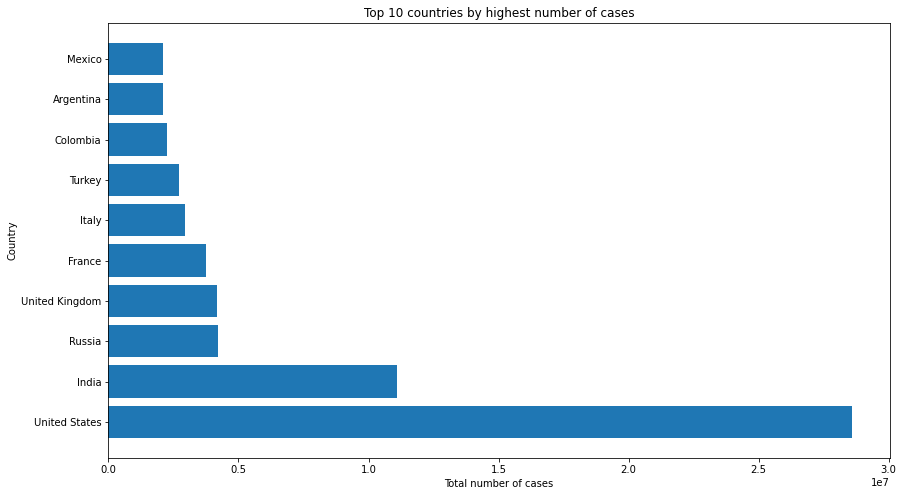

In [13]:
#top 10 countries by highest number of cases
plt.figure(figsize=(14,8))

plt.barh(df2['Entity'], 
        df2['Cases'])

plt.xlabel('Total number of cases')
plt.ylabel('Country')
plt.title('Top 10 countries by highest number of cases');

United States had the highest number of COVID-19 cases with approximately 2.86 million, followed by India and Russia.

## Visualization 2: Top 10 countries by number of deaths

In [14]:
df3 = df.copy()
df3 = df3.groupby('Entity').max().sort_values(by='Deaths',ascending=False)[:10].reset_index()
df3.head()

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,United States,North America,37.09,-95.71,11,2.77,2.57,65297.5,325719178,38,16,2021-02-28,2238400.0,28605669.0,513091.0
1,Mexico,North America,23.63,-102.55,22,1.38,2.23,9946.0,129163276,29,7,2021-02-28,46498.0,2086938.0,185715.0
2,India,Asia,20.59,78.96,25,0.53,0.76,2099.6,1339180127,28,6,2021-02-28,1492409.0,11112241.0,157157.0
3,United Kingdom,Europe,55.38,-3.44,8,2.54,2.82,42330.1,66022273,40,18,2021-02-28,801949.0,4188827.0,123083.0
4,Italy,Europe,41.87,12.57,14,3.18,4.02,33228.2,60551416,47,23,2021-02-28,353704.0,2925265.0,97699.0


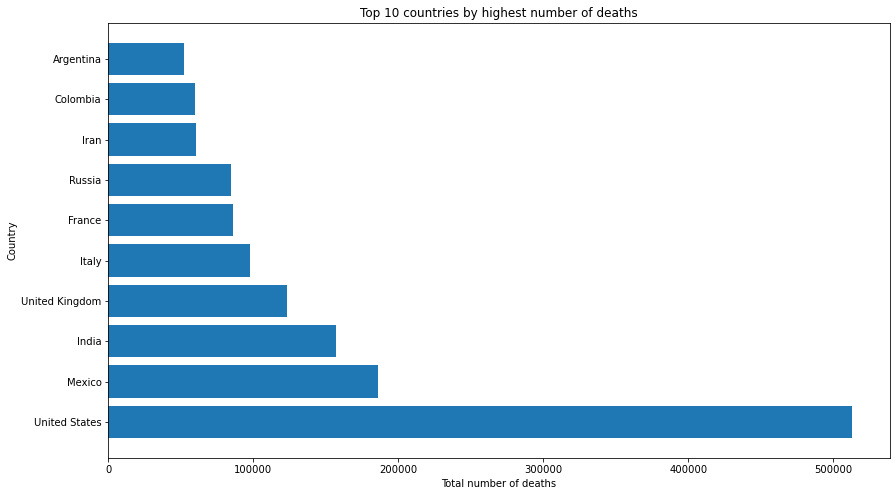

In [15]:
#total number of deaths for top 10 countries
plt.figure(figsize=(14,8))

plt.barh(df3['Entity'], 
        df3['Deaths'])

plt.xlabel('Total number of deaths')
plt.ylabel('Country')
plt.title('Top 10 countries by highest number of deaths');

United States had the highest COVID-19 deaths of 513000 deaths, followed by Mexico and India.

## Visualization 3: Top 10 countries by death rate

In [16]:
#top 10 countries by death rate 
df4 = df.copy()
df4['Death rate'] = df4['Deaths']/ df4['Population']
df4 = df4.groupby('Entity').max().sort_values(by='Death rate',ascending=False)[:10].reset_index()
df4.head()

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths,Death rate
0,Belgium,Europe,50.50,4.47,10,5.64,3.01,46420.7,11372068,41,19,2021-02-28,80815.0,771511.0,22077.0,0.001941
1,United Kingdom,Europe,55.38,-3.44,8,2.54,2.82,42330.1,66022273,40,18,2021-02-28,801949.0,4188827.0,123083.0,0.001864
2,Slovenia,Europe,46.15,15.00,11,4.50,2.82,25946.2,2066748,44,20,2021-02-28,46807.0,190081.0,3836.0,0.001856
3,Italy,Europe,41.87,12.57,14,3.18,4.02,33228.2,60551416,47,23,2021-02-28,353704.0,2925265.0,97699.0,0.001613
4,Portugal,Europe,39.40,-8.22,15,3.39,4.43,23252.1,10293718,46,22,2021-02-28,76965.0,804562.0,16317.0,0.001585


Text(0.5, 1.0, 'Top 10 countries by death rate')

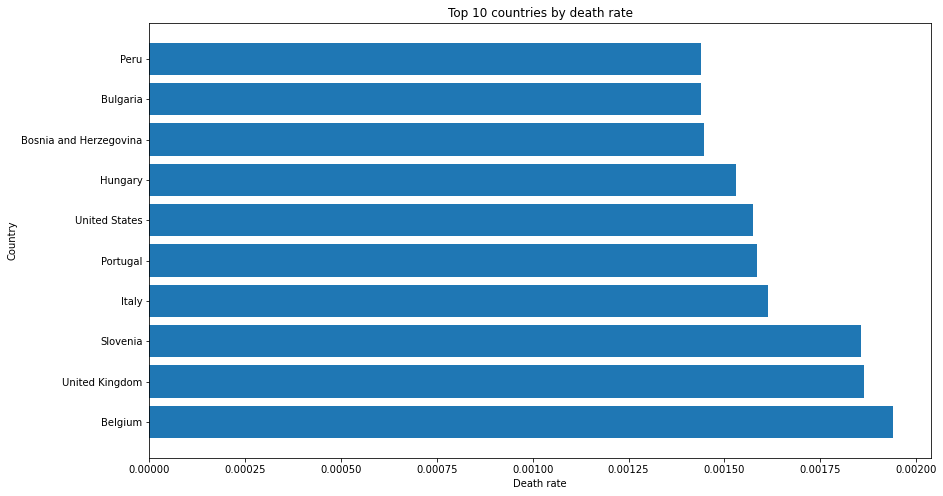

In [17]:
#top 10 countries by death rate
plt.figure(figsize=(14,8))

plt.barh(df4['Entity'], 
        df4['Death rate'])

plt.xlabel('Death rate')
plt.ylabel('Country')
plt.title('Top 10 countries by death rate')

Belgium had the highest COVID-19 death rate of 1.94 deaths per 1000 citizens, followed by United Kingdom and Slovenia.

# Export to SQLite3 database

In [ ]:
#import sqlite3
import sqlite3

#create connection to sqlite3 database
conn = sqlite3.connect("../test.sqlite")

#export/overwrite df to sqlite3 database
df.to_sql(name='Covid19', con=conn, if_exists='replace', index=False)

#closes connection
conn.close()

## Retrieve data for Visualization 1

In [ ]:
import pandas as pd
import sqlite3

#create connection to sqlite3 database
conn = sqlite3.connect("../test.sqlite")

#read sqlite query into a pandas dataframe
df = pd.read_sql_query("SELECT Entity, Cases from Covid19", conn)

#closes connection
conn.close()

## Retrieve data for Visualization 2

In [ ]:
import pandas as pd
import sqlite3

#create connection to sqlite3 database
conn = sqlite3.connect("../test.sqlite")

#read sqlite query into a pandas dataframe
df = pd.read_sql_query("SELECT Entity, Deaths from Covid19", conn)

#closes connection
conn.close()

## Retrieve data for Visualization 3

In [ ]:
import pandas as pd
import sqlite3

#create connection to sqlite3 database
conn = sqlite3.connect("../test.sqlite")

#read sqlite query into a pandas dataframe
df = pd.read_sql_query("SELECT Entity, Deaths, Population from Covid19", conn)

#closes connection
conn.close()